In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Table_Optimal.csv')

In [3]:
df[df['$t$']==99]['ExpValue']

1     3809.464355
2     3224.683594
3     3809.333984
4     3117.512695
5     3224.683594
6     3224.683838
7     3137.814697
8     3809.464355
9     3649.846680
10    3525.947510
Name: ExpValue, dtype: float64

In [4]:
print df.dtypes

$c^{1}$       int64
$c^{2}$       int64
$c^{3}$       int64
$c^{4}$       int64
$c^{5}$       int64
$y^{1}$       int64
$y^{2}$       int64
$y^{3}$       int64
$y^{4}$       int64
$y^{5}$       int64
$t$           int64
ExpValue    float64
$d_{0}$       int64
$d_{1}$       int64
$d_{2}$       int64
$d_{3}$       int64
$d_{4}$       int64
$d_{5}$       int64
dtype: object


In [5]:
df_Series2 = pd.DataFrame(index=['$d_{0}$', '%%%%%'], columns=range(6))

for j in df.groupby('$d_{0}$').size().index:
    df_Series2[j]['$d_{0}$'] = df.groupby('$d_{0}$').size()[j]
for j in df.groupby('$d_{0}$').size().index:    
    df_Series2[j]['%%%%%'] = np.around((df_Series2[j]['$d_{0}$']/df_Series2.sum(axis=1)['$d_{0}$'])*100, 2)

print df_Series2.to_latex()

\begin{tabular}{lllllll}
\toprule
{} &      0 &     1 &     2 &      3 &      4 &    5 \\
\midrule
\$d\_\{0\}\$ &  23029 &  1037 &  2370 &   3981 &   4543 &  NaN \\
\%\%\%\%\%   &  65.87 &  2.97 &  6.78 &  11.39 &  12.99 &  NaN \\
\bottomrule
\end{tabular}



In [6]:
df_Series = pd.DataFrame(index=df.dtypes[13:].index, columns=[0, 1,  2, 3])

for i in df.dtypes[13:].index:
    for j in df.groupby(i).size().index:
        df_Series[j][i] = df.groupby(i).size()[j]
    
for i in range(4):
    df_Series[str(i)+'%'] = pd.Series((df_Series[i]/df_Series.sum(axis=1))*100)
    for j in df_Series.index:
        df_Series[str(i)+'%'][j] = np.around(df_Series[str(i)+'%'][j], 2)
    
df_Series = df_Series.reindex_axis([0, '0%', 1, '1%', 2, '2%', 3, '3%'], axis=1)

print df_Series.to_latex()

\begin{tabular}{lllllllll}
\toprule
{} &      0 &     0\% &      1 &     1\% &      2 &     2\% &     3 &     3\% \\
\midrule
\$d\_\{1\}\$ &  33604 &  96.12 &    285 &   0.81 &    NaN &    NaN &  1071 &   3.06 \\
\$d\_\{2\}\$ &  31847 &   91.1 &    447 &   1.28 &     14 &   0.04 &  2652 &   7.57 \\
\$d\_\{3\}\$ &  28318 &     81 &   1438 &    4.1 &    616 &   1.76 &  4588 &  13.09 \\
\$d\_\{4\}\$ &  21140 &  60.47 &   4906 &  14.01 &   4073 &  11.63 &  4841 &  13.81 \\
\$d\_\{5\}\$ &   8392 &     24 &  15990 &  45.71 &  10578 &   30.2 &   NaN &    NaN \\
\bottomrule
\end{tabular}



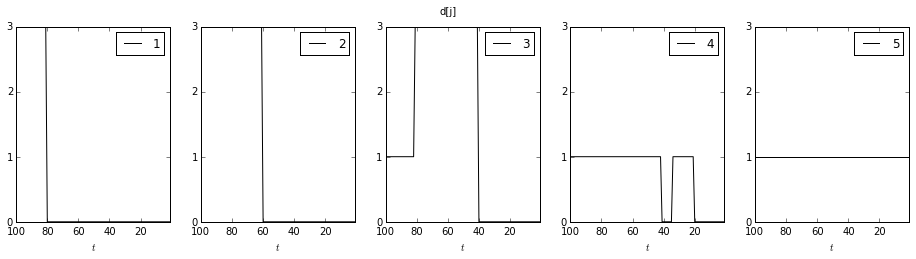

In [7]:
df_Series3 = df[(df['$c^{1}$'] == 1) & (df['$c^{2}$'] == 1) & (df['$c^{3}$'] == 1) & (df['$c^{4}$'] == 1)
               & (df['$c^{5}$'] == 1)]

df3 = pd.DataFrame(index=df_Series3['$t$'])
g = 1 
for i in df.dtypes[13:].index:
    df3[g] = np.array(df_Series3[i])
    g = g+1
del g

plt.figure()
# Y-Achse ist abhängig von der Anzahl der möglichen Entscheidungen
df3.plot(subplots=True, layout=(1, 5), figsize=(16, 3.5), sharex=False, yticks=np.arange(0, 4, 1.0), title='d[j]')
plt.savefig('OP-J.png') 

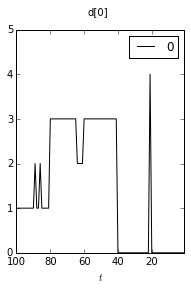

In [8]:
df4 = pd.DataFrame(index=df_Series3['$t$'])
df4[0] = np.array(df_Series3['$d_{0}$'])

plt.figure()
# Y-Achse ist abhängig von der Anzahl der Produkte
df4.plot(subplots=True, layout=(1, 1), figsize=(3, 4), sharex=False, yticks=np.arange(0, 6, 1.0), title='d[0]')
plt.savefig('OP-0.png') 

df3[0] = np.array(df_Series3['$d_{0}$'])
# Spaten abhängig von der Anzahl der Produkte
df3_Series = df3.reindex_axis([0, 1, 2, 3, 4, 5], axis=1)

#print df3_Series.to_latex()